In [1]:
# Importing required libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Importing & Understanding

In [2]:
carprice = pd.read_csv('CarPrice_Assignment.csv')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
#Checking the percentage of missing values
round(carprice.isnull().sum()/len(carprice) * 100,2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

### Data Cleaning & Preparation

In [5]:
#Dropping CarID as its is not required for further analysis
carprice.drop(labels = ['car_ID'], axis = 1, inplace = True)

In [6]:
#Replacing the name of car's brand from CarName variable  converting it to lowercase
carprice['CarName'] = carprice['CarName'].str.split(" ").str[0].str.lower()
carprice.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#check for unique values in CarName variable
carprice['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#Cleaning Car Name variable values
carprice['CarName'].replace({'maxda':'mazda','porcshce':'porsche','vokswagen':'volkswagen','vw':'volkswagen','toyouta':'toyota'},inplace=True)

In [9]:
# Getting the mean, median statistics by price of car by brand
pv = pd.pivot_table(carprice,values='price',columns='CarName',aggfunc=('mean','median','count','sum'),fill_value=0).transpose().sort_values(['median'],ascending=False)
pv

,count,mean,median,sum
CarName,,,,
jaguar,3.0,34600.000000,35550.0,103800.000
buick,8.0,33647.000000,32892.0,269176.000
porsche,5.0,31400.500000,32528.0,157002.500
bmw,8.0,26118.750000,22835.0,208950.000
volvo,11.0,18063.181818,18420.0,198695.000
audi,7.0,17859.166714,17710.0,125014.167
peugeot,11.0,15489.090909,16630.0,170380.000
mercury,1.0,16503.000000,16503.0,16503.000
alfa-romero,3.0,15498.333333,16500.0,46495.000


In [11]:
#creating a derived variable cartype - HighEnd, MidTier, Budget based on the price

carprice['cartype'] = pd.cut(carprice['price'], [0, 10000, 16000, 50000], labels=['Budget', 'MidTier', 'HighEnd'])
carprice.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cartype
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,MidTier
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,HighEnd
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,HighEnd
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,MidTier
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,HighEnd


In [12]:
carprice.drop(labels = ['CarName'], axis = 1, inplace = True)

#### Understanding Continuous & Categorical variables

In [13]:
carprice.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [14]:
#converting symboling to string type to keep it categorical
carprice['symboling'] =carprice['symboling'].astype(str)

In [15]:
#checking unique values of categorical variables
print('cartype : ' ,carprice['cartype'].unique())
print('symboling : ' ,carprice['symboling'].unique())
print('fueltype : ' ,carprice['fueltype'].unique())
print('aspiration : ' ,carprice['aspiration'].unique())
print('doornumber : ' ,carprice['doornumber'].unique())
print('carbody : ' ,carprice['carbody'].unique())
print('drivewheel : ' ,carprice['drivewheel'].unique())
print('enginelocation : ' ,carprice['enginelocation'].unique())
print('enginetype : ' ,carprice['enginetype'].unique())
print('cylindernumber : ' ,carprice['cylindernumber'].unique())
print('fuelsystem : ' ,carprice['fuelsystem'].unique())


cartype :  [MidTier, HighEnd, Budget]
Categories (3, object): [Budget < MidTier < HighEnd]
symboling :  ['3' '1' '2' '0' '-1' '-2']
fueltype :  ['gas' 'diesel']
aspiration :  ['std' 'turbo']
doornumber :  ['two' 'four']
carbody :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel :  ['rwd' 'fwd' '4wd']
enginelocation :  ['front' 'rear']
enginetype :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


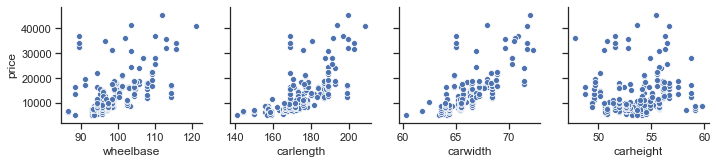

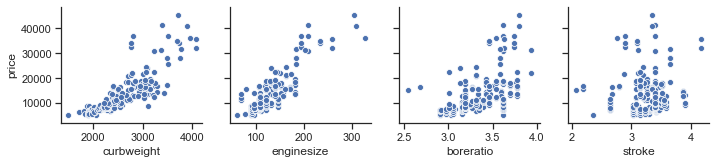

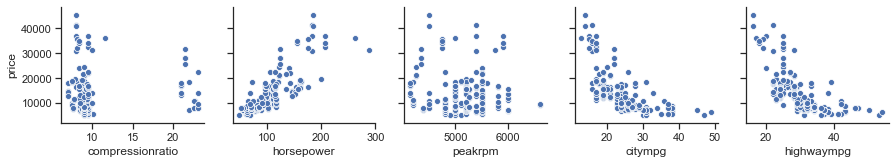

In [16]:
# Plotting continuous independent variables to check for linear relationship with price
sns.set(style="ticks", color_codes=True)
sns.pairplot(carprice,x_vars=['wheelbase','carlength','carwidth','carheight'],y_vars=['price'])
sns.pairplot(carprice,x_vars=['curbweight','enginesize','boreratio','stroke'],y_vars=['price'])
sns.pairplot(carprice,x_vars=['compressionratio','horsepower','peakrpm','citympg','highwaympg'],y_vars=['price'])
plt.show()

In [17]:
#Dropping variables which don't show a linearrelation with price
carprice.drop(labels = ['carheight','stroke','peakrpm','compressionratio'], axis = 1, inplace = True)

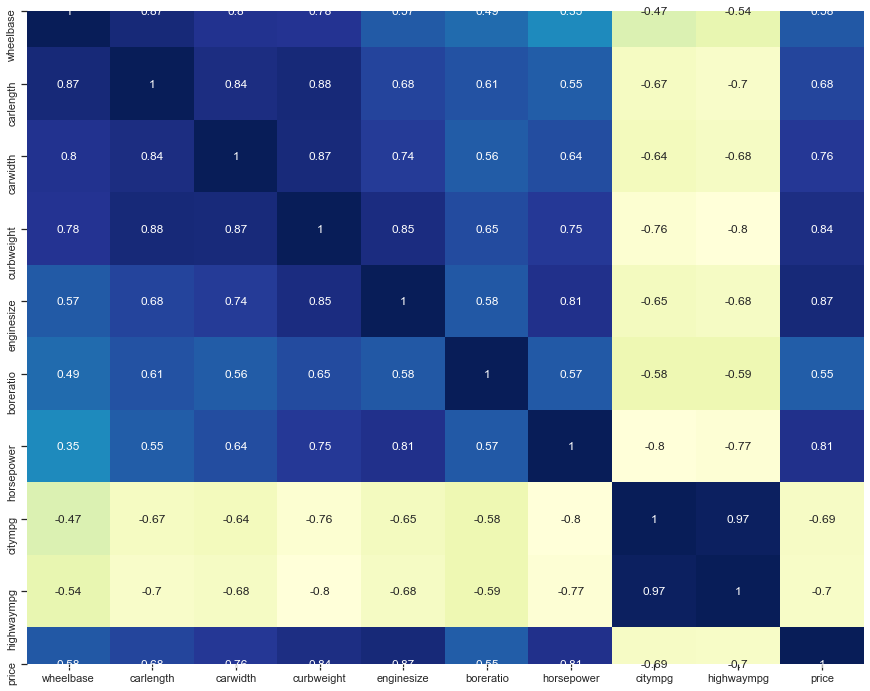

In [18]:
#Checking correlation among continuous variables
plt.figure(figsize = (15, 12))
sns.heatmap(carprice.corr(), cmap="YlGnBu", cbar=False, fmt='.2g', annot = True)
plt.show()

In [19]:
#Dropping citympg as it is 100% orrelated with highwaympg
carprice.drop(labels = ['citympg'], axis = 1, inplace = True)

In [20]:
#Converting labels of doornumber & cylindernumber to numbers.
carprice['doornumber'] = carprice['doornumber'].map({'two':2, 'four':4}).astype(str)
carprice['cylindernumber'] = carprice['cylindernumber'].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12 }).astype(str)

# Converting enginetype dohcv to dohc as dohcv Engine type is not available
carprice.loc[(carprice.enginetype=='dohcv') ,'enginetype'] = 'dohc'

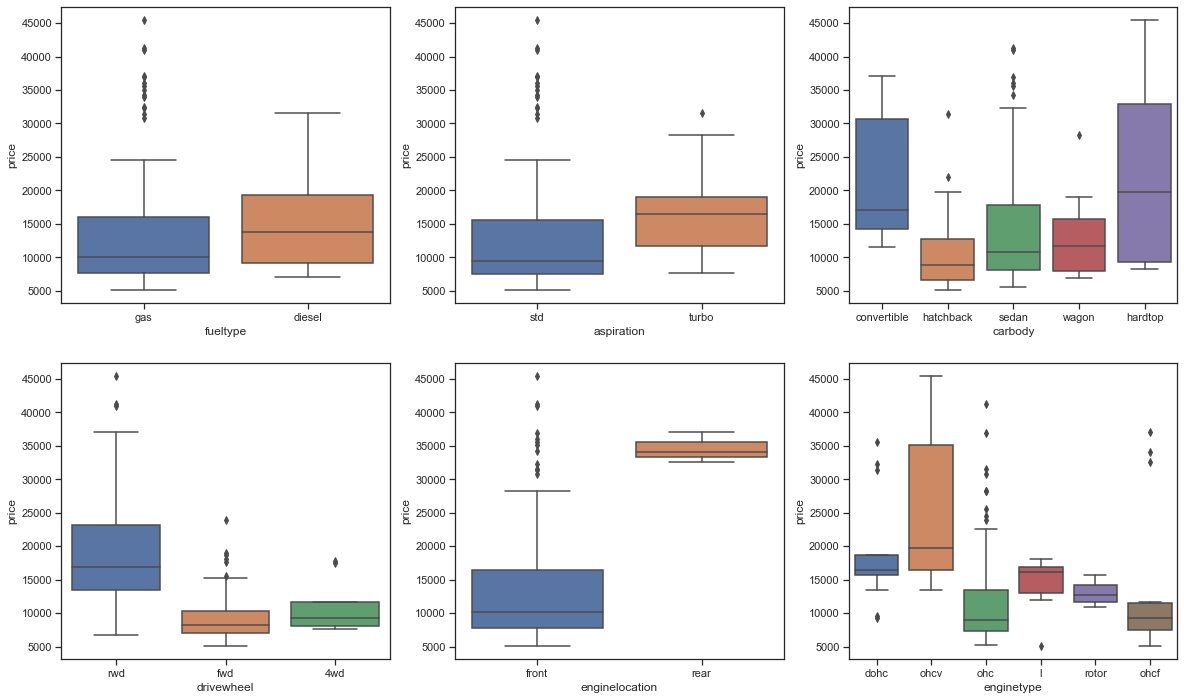

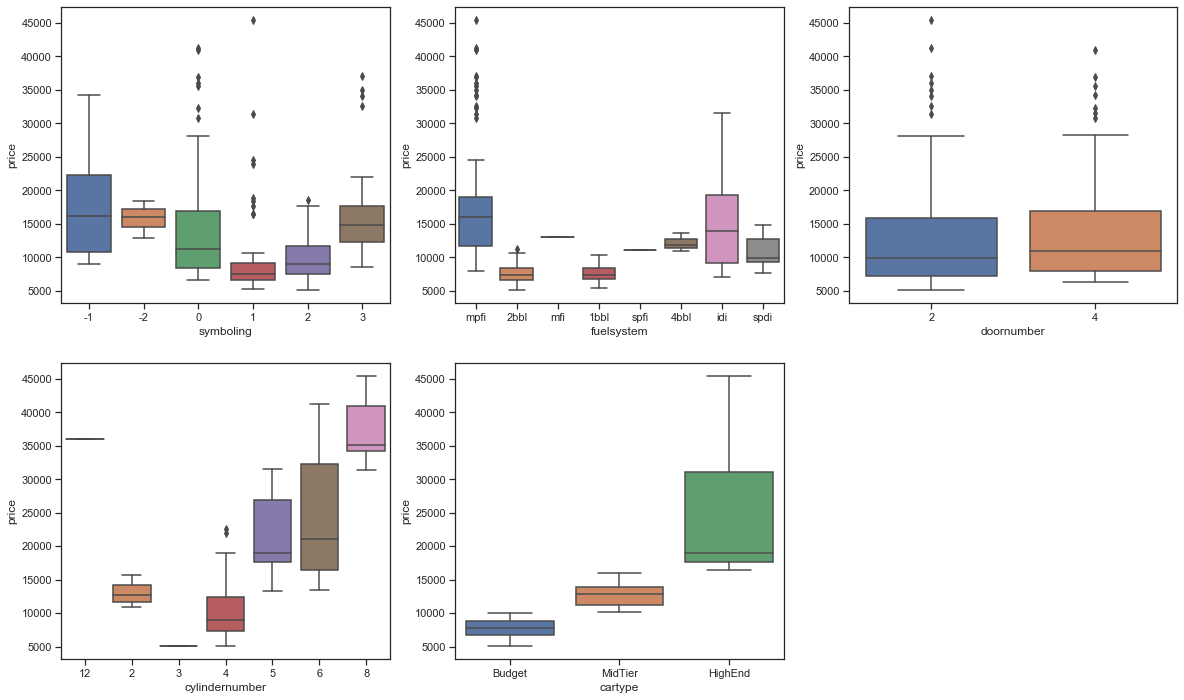

In [21]:
#Plotting Categorical Variables with Price using box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.show()

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'cartype', y = 'price', data = carprice)
plt.show()

In [22]:
#creating dummies for all categorical variables
carprice = pd.get_dummies(carprice, drop_first = True)
print(carprice.columns)
carprice.head()


Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'highwaympg', 'price', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_4', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_2', 'cylindernumber_3',
       'cylindernumber_4', 'cylindernumber_5', 'cylindernumber_6',
       'cylindernumber_8', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'cartype_MidTier',
       'cartype_HighEnd'],
      dtype='object')


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,price,symboling_-2,...,cylindernumber_8,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cartype_MidTier,cartype_HighEnd
0,88.6,168.8,64.1,2548,130,3.47,111,27,13495.0,0,...,0,0,0,0,0,1,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,27,16500.0,0,...,0,0,0,0,0,1,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,26,16500.0,0,...,0,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,30,13950.0,0,...,0,0,0,0,0,1,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,22,17450.0,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
#checking the datatypes of all variables in the dataframe
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
horsepower             205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
symboling_-2           205 non-null uint8
symboling_0            205 non-null uint8
symboling_1            205 non-null uint8
symboling_2            205 non-null uint8
symboling_3            205 non-null uint8
fueltype_gas           205 non-null uint8
aspiration_turbo       205 non-null uint8
doornumber_4           205 non-null uint8
carbody_hardtop        205 non-null uint8
carbody_hatchback      205 non-null uint8
carbody_sedan          205 non-null uint8
carbody_wagon          205 non-null uint8
dri

In [24]:
carprice.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00
highwaympg,205.0,30.751220,6.886443,16.00,25.00,30.00,34.00,54.00
price,205.0,13276.710571,7988.852332,5118.00,7788.00,10295.00,16503.00,45400.00
symboling_-2,205.0,0.014634,0.120377,0.00,0.00,0.00,0.00,1.00


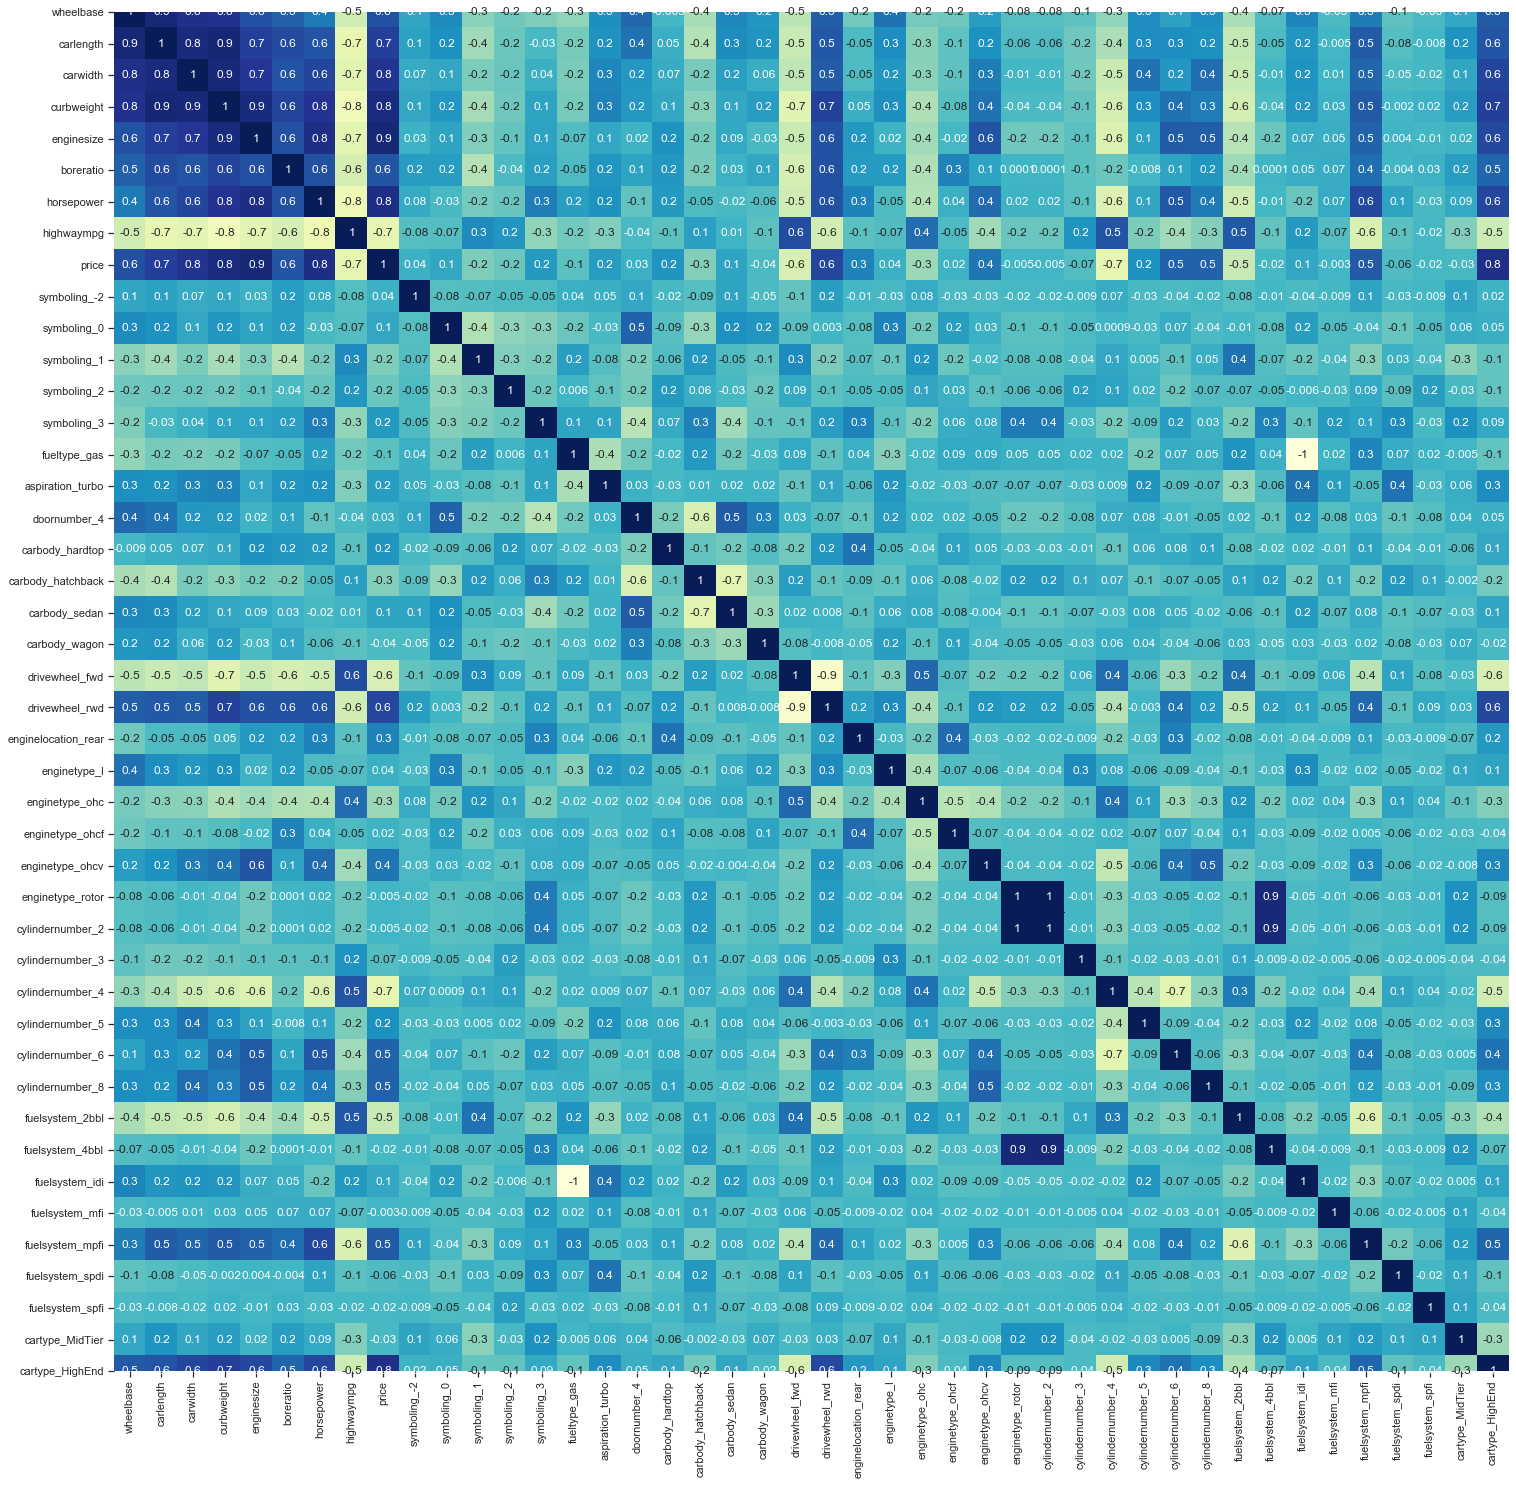

In [25]:
#plotting correlation matrix for all variables
plt.figure(figsize = (25, 25))
sns.heatmap(carprice.corr(), cmap="YlGnBu", cbar=False, fmt='.1g', annot = True)
plt.show()

In [26]:
#Dropping cylindernumber_2 as it is 100% orrelated with enginetype_rotor
carprice.drop(labels = ['cylindernumber_2'], axis = 1, inplace = True)

In [27]:
# Splitting data into train and test 
CP_train, CP_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
#Scaling train data using MinMax Scaler
scaler = MinMaxScaler()
num_vars = [ 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
   'horsepower', 'highwaympg', 'price']

CP_train[num_vars] = scaler.fit_transform(CP_train[num_vars])
CP_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,price,symboling_-2,...,cylindernumber_8,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cartype_MidTier,cartype_HighEnd
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.567568,0.068818,0,...,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.270270,0.466890,0,...,0,0,0,0,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.324324,0.122110,0,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.270270,0.314446,0,...,0,0,0,0,0,1,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.135135,0.382131,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
#creating X_train & y_train from CP_train
y_train = CP_train.pop('price')
X_train = CP_train

### Building model

#### using RFE for top 12 feature selection

In [30]:
# Running RFE to output top 12 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 24),
 ('carwidth', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 6),
 ('horsepower', True, 1),
 ('highwaympg', False, 5),
 ('symboling_-2', False, 11),
 ('symboling_0', False, 16),
 ('symboling_1', False, 17),
 ('symboling_2', False, 15),
 ('symboling_3', False, 25),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', False, 22),
 ('doornumber_4', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 14),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', False, 13),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_3', True, 1),
 ('cylindernumber_4', False, 12),
 ('cylindernumber_5', False, 26),
 ('cylindernumber_6', False, 8),
 ('cylindernumber_8', True, 1),
 ('fuels

In [32]:
# Extracting top 12 variables in ind_vars
ind_vars = X_train.columns[rfe.support_]
ind_vars

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_3',
       'cylindernumber_8', 'cartype_HighEnd'],
      dtype='object')

#### Building model using statsmodel for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[ind_vars]

In [34]:
# Adding a constant variable & fitting the linear regression model
X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_sm).fit()   

#summary of First linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.95e-63
Time:                        22:03:36   Log-Likelihood:                 193.24
No. Observations:                 143   AIC:                            -360.5
Df Residuals:                     130   BIC:                            -322.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0598    

In [35]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,13.08
0,const,10.08
3,enginesize,7.92
4,horsepower,4.86
1,wheelbase,4.17
12,cartype_HighEnd,2.29
8,enginelocation_rear,1.67
5,carbody_hardtop,1.53
9,enginetype_rotor,1.42
6,carbody_hatchback,1.40


In [36]:
#Dropping variable with highest p-value
X_train_sm = X_train_sm.drop(['carbody_hardtop'], axis=1)

In [37]:
#Fitting the model again on remaining data
lr_2 = sm.OLS(y_train,X_train_sm).fit()   

#summary of second linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.02e-64
Time:                        22:04:02   Log-Likelihood:                 193.04
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     131   BIC:                            -326.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0609    

In [38]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,13.08
0,const,9.97
3,enginesize,7.91
4,horsepower,4.86
1,wheelbase,4.17
11,cartype_HighEnd,2.28
8,enginetype_rotor,1.42
5,carbody_hatchback,1.38
6,carbody_wagon,1.35
7,enginelocation_rear,1.19


In [39]:
#Dropping variable with highest p-value
X_train_sm = X_train_sm.drop(['wheelbase'], axis=1)

#Fitting the model again on remaining data
lr_3 = sm.OLS(y_train,X_train_sm).fit()   

#summary of Third linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.64e-65
Time:                        22:04:58   Log-Likelihood:                 192.18
No. Observations:                 143   AIC:                            -362.4
Df Residuals:                     132   BIC:                            -329.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0528    

In [40]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.59
2,enginesize,7.79
1,curbweight,7.08
3,horsepower,4.14
10,cartype_HighEnd,2.25
7,enginetype_rotor,1.41
4,carbody_hatchback,1.36
5,carbody_wagon,1.33
9,cylindernumber_8,1.19
6,enginelocation_rear,1.17


In [41]:
#Dropping variable with highest p-value
X_train_sm = X_train_sm.drop(['cylindernumber_3'], axis=1)

#Fitting the model again on remaining data
lr_4 = sm.OLS(y_train,X_train_sm).fit()   

#summary of fourth linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           6.94e-66
Time:                        22:05:15   Log-Likelihood:                 191.21
No. Observations:                 143   AIC:                            -362.4
Df Residuals:                     133   BIC:                            -332.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0498    

In [42]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.42
2,enginesize,7.79
1,curbweight,7.02
3,horsepower,4.13
9,cartype_HighEnd,2.23
7,enginetype_rotor,1.41
4,carbody_hatchback,1.35
5,carbody_wagon,1.32
8,cylindernumber_8,1.19
6,enginelocation_rear,1.17


In [43]:
#Dropping variable with highest p-value
X_train_sm = X_train_sm.drop(['horsepower'], axis=1)

#Fitting the model again on remaining data
lr_5 = sm.OLS(y_train,X_train_sm).fit()   

#summary of 5th linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.36e-66
Time:                        22:05:40   Log-Likelihood:                 190.15
No. Observations:                 143   AIC:                            -362.3
Df Residuals:                     134   BIC:                            -335.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0525    

In [44]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.30
1,curbweight,6.90
2,enginesize,6.11
8,cartype_HighEnd,2.20
4,carbody_wagon,1.32
6,enginetype_rotor,1.31
3,carbody_hatchback,1.25
7,cylindernumber_8,1.17
5,enginelocation_rear,1.11


In [45]:
#Dropping variable with highest p-value
X_train_sm = X_train_sm.drop(['carbody_wagon'], axis=1)

#Fitting the model again on remaining data
lr_6 = sm.OLS(y_train,X_train_sm).fit()   

#summary of 6th linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.20e-67
Time:                        22:06:04   Log-Likelihood:                 188.55
No. Observations:                 143   AIC:                            -361.1
Df Residuals:                     135   BIC:                            -337.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0539    

In [46]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.28
1,curbweight,5.76
2,enginesize,5.30
7,cartype_HighEnd,2.12
5,enginetype_rotor,1.27
3,carbody_hatchback,1.20
6,cylindernumber_8,1.17
4,enginelocation_rear,1.10


In [47]:
#Dropping variable with high p-value
X_train_sm = X_train_sm.drop(['carbody_hatchback'], axis=1)

#Fitting the model again on remaining data
lr_7 = sm.OLS(y_train,X_train_sm).fit()   

#summary of 7th linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.93e-67
Time:                        22:06:36   Log-Likelihood:                 186.46
No. Observations:                 143   AIC:                            -358.9
Df Residuals:                     136   BIC:                            -338.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0701    

In [48]:
#Calculating VIF 
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.17
1,curbweight,5.34
2,enginesize,5.20
6,cartype_HighEnd,2.12
4,enginetype_rotor,1.18
5,cylindernumber_8,1.16
3,enginelocation_rear,1.09


#### Fitting the model on training data to get predicted values of target

In [49]:
y_train_pred = lr_7.predict(X_train_sm)

In [50]:
from sklearn.metrics import  r2_score
r_squared = r2_score(y_train, y_train_pred)
r_squared

0.9065913660899473

#### Residual Analysis

Text(0.5, 0, 'Errors')

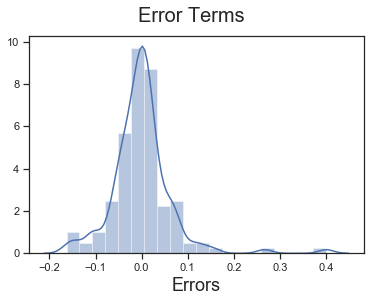

In [51]:
#Plotting the error values 

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

#### Error terms are normally distributed as per assumption

### Model Evaluation

In [52]:
# Transfoming the scaler on test data 
num_vars = num_vars = [ 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
   'horsepower', 'highwaympg', 'price']

CP_test[num_vars] = scaler.transform(CP_test[num_vars])

In [53]:
X_train_sm.columns

Index(['const', 'curbweight', 'enginesize', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_8', 'cartype_HighEnd'],
      dtype='object')

In [54]:
# Creating X_test & y_test, keeping only required variables as per model
y_test = CP_test['price']
X_test = CP_test[[ 'curbweight', 'enginesize', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_8', 'cartype_HighEnd']]

In [55]:
# Adding the constant to the test data and fit the last linear regression model(lr_7)
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_7.predict(X_test_sm)

In [56]:
#Calculating R-Square for Test data
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9297542470655699

Adjusted R-Square score for train data is 0.902 and R-square score for test data is 0.929

Text(0.5, 0, 'Errors')

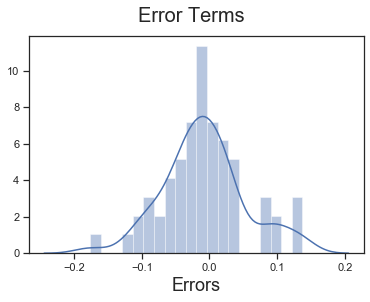

In [57]:
#Plotting Error values for Test data

fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

##### Error values are approximately normally distributed

Text(0.5, 0.98, 'Actual and Predicted')

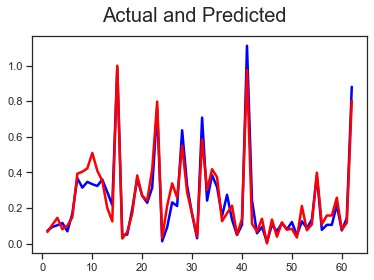

In [61]:
#Actual vs Predicted values of test data
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               


Actual and Predicted values are almost in sync

### Final equation to calculate price of a car 

#### price = 0.2234(curbweight) + 0.5943(enginesize) + 0.2872(enginelocation_rear) + 0.1826(enginetype_rotor) + 0.1345(cylindernumber_8) + 0.1734(cartype_HighEnd) - 0.0701